In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


SAMPLE: (np.int64(1), np.int64(1), 'AC-CAR-16P-2024')


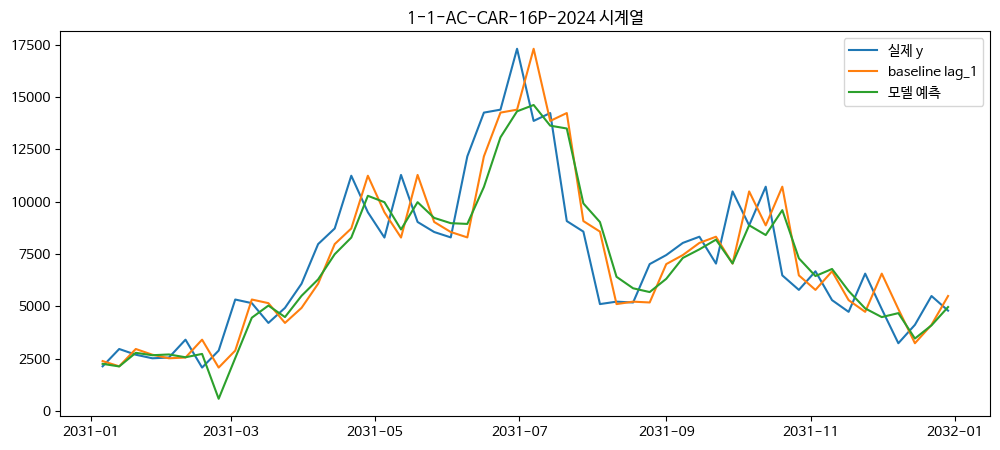

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


BASE = Path("../app/data_pipeline")
te = pd.read_csv(BASE / "features_test.csv", parse_dates=["target_date"])
pred = pd.read_csv(BASE / "predictions.csv", parse_dates=["target_date"])

df = te.merge(
    pred[["warehouse_id","store_id","sku_id","target_date","y_pred"]],
    on=["warehouse_id","store_id","sku_id","target_date"],
    how="left"
)

# 임의 SKU 하나 골라보기
sample_key = df.groupby(["warehouse_id","store_id","sku_id"]).size().idxmax()
wh, st, sku = sample_key
print("SAMPLE:", sample_key)

sub = df[(df["warehouse_id"]==wh) & (df["store_id"]==st) & (df["sku_id"]==sku)].copy()
sub = sub.sort_values("target_date")

plt.figure(figsize=(12,5))
plt.plot(sub["target_date"], sub["y"], label="실제 y")
plt.plot(sub["target_date"], sub["lag_1"], label="baseline lag_1")
plt.plot(sub["target_date"], sub["y_pred"], label="모델 예측")
plt.legend()
plt.title(f"{wh}-{st}-{sku} 시계열")
plt.show()


In [7]:
from pathlib import Path
import pandas as pd

BASE = Path("../app/data_pipeline")
tr = pd.read_csv(BASE / "features_train.csv", parse_dates=["target_date"])
te = pd.read_csv(BASE / "features_test.csv", parse_dates=["target_date"])

print("TRAIN 기간:", tr["target_date"].min(), " ~ ", tr["target_date"].max())
print("TEST  기간:", te["target_date"].min(), " ~ ", te["target_date"].max())


TRAIN 기간: 2023-02-27 00:00:00  ~  2030-12-30 00:00:00
TEST  기간: 2031-01-06 00:00:00  ~  2031-12-29 00:00:00


In [8]:
print(
    te.groupby(["warehouse_id","store_id","sku_id"])["target_date"]
      .agg(["min","max","count"])
      .head()
)


                                                  min        max  count
warehouse_id store_id sku_id                                           
1            1        AC-CAR-16P-2024      2031-01-06 2031-12-29     52
                      AC-LG-STAND-18P-2024 2031-01-06 2031-12-29     52
                      AC-LG-WS-6P-2024     2031-01-06 2031-12-29     52
                      AC-SAM-WF-18P-2024   2031-01-06 2031-12-29     52
                      AIR-LG-PURI-58-2024  2031-01-06 2031-12-29     52
